<a href="https://colab.research.google.com/github/rishikadeshmukh/EDA/blob/main/my_EDA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [ ]:
! git clone https://github.com/DS3001/visualization
! git clone https://github.com/DS3001/wrangling

fatal: destination path 'visualization' already exists and is not an empty directory.
Cloning into 'wrangling'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 83 (delta 31), reused 11 (delta 11), pack-reused 43
Receiving objects: 100% (83/83), 10.85 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (36/36), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn

df = pd.read_csv('/content/wrangling/assignment/data/college_completion.csv')
print (df.shape, '\n') # 3798 observations, 63 variables
print( df.head(), '\n')

print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')
#The most common insitution is a private non-for-profit 4 year college
#The least common insitution is a private not for profit 2 year college
#It is more common to have a 4 year private college than a 2 year private college

In [ ]:
sns.histplot(df['grad_100_value'])


In [ ]:
sns.kdeplot(df['grad_100_value'])


In [ ]:
sns.boxplot(data=df, x='grad_100_value')
df['grad_100_value'].describe()


In [ ]:
var1 = 'control'
var2 ='level'

sns.kdeplot(data=df,x='grad_100_value',hue= var1)

In [ ]:
sns.kdeplot(data=df,x='grad_100_value',hue= var2)


Public schools have a higher density of low graduation rates than private schools. Private schools for no porfit have a higher desnity of higher gradution rates than that of private schools that are for profit. In the graph by level, 2 year college have a higher density of lower gration rates than 4 year colleges

In [ ]:
df.loc[:,[var1,'grad_100_value']].groupby(var1).describe()

In [ ]:
df.loc[:,[var2,'grad_100_value']].groupby(var2).describe()

Which institutions appear to have the best graduation rates?

Private not-for-profit appears to have the best rate of gradution with 41.67% being the mean percent of graduation. A 4 year college appaears to have the best rate of graduation with a higher rate for its mean compared to a 2 year college.

In [ ]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [ ]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

Which institutions appear to have the best graduation rates?

It appears that that a 2 year private not for profit university as the best gradution rate with a higher mean rate of 41.91% (comparing with all colleges of all level and control). When observing the comparsion between the two levels, it appears that a 2 year and 4 year private not for profit college have a very small difference in its mean which can indicate that there is is very little differences among the level for that control. However, a 4 year public college has about double the mean graduation rate as a 2 year public school, which can showthat the difference in level for a public school can play a large role in education for public schools. Overall, a private 2 year college seems better than a 4 year private school (both profit and non profit)

In [ ]:
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_arcsinh') # Here is the illusive second mode

In [ ]:
sns.kdeplot(data=df,x='aid_value')

In [ ]:
sns.kdeplot(data=df,x='aid_value',hue='control')

In [ ]:
sns.kdeplot(data=df,x='aid_value',hue='level')

The shape of graphs are governed by the aid value provided. When observing  the control variable, private schools not for profit seem to offer a higher density of more aid compared to private for profit and public schools. When obersiving the level variable, it appaears that 4 year univeristy offers more aid at lower densities, while a 2 year college offers smaller aid but for a greater amount of people.

In [ ]:
df.loc[:,['control','aid_value']].groupby('control').describe()

In [ ]:
df.loc[:,['level','aid_value']].groupby('level').describe()

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

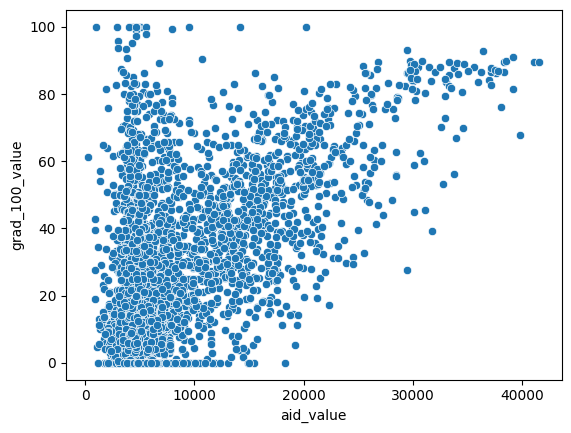

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')

There is a general positive association between grad 100 and aid value. You can also see that graduation rates increase but the aid given does not associate with this growth.

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')

Describe what you see. For which kinds of institutions do aid seem to increase graduation rates?

There is a positive association for 4-year, Private non profit institutions, where aid_value and grad_100_value increase together. The other colleges have varying results, and seem to give very low aid. This seems to make sense since students that are given money for their education have more motivation to do well and graduate.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. COVID-19 Nursing Home Data (2023)

2. For categorical data, the missing values are indicated by whether or not any data was submitted for a reporting week with either Y for yes or N for no. There does not seem to be a reason for missing data in the data dictionary which is odd considering that there is a whole row for a couple variables that are NaN values. In my opinion, the data dictionary explains each variable fairly well, I am a little confused with why some variables were included when ther eis no reported data but other variables are also interesting to consider for this assignment



In [ ]:
dff = pd.read_csv('/content/faclevel_2023.csv')
#print(dff.shape)
dff.head()

The variables I chose are provider state name, Percentage of Residents Up to Date with the vaccine, and total confirmed covid cases. I think these are jointly interesting because it can indicate if their is a clear association with how many people have the vaccine with the total number of covid cases of residents in the nursing home and where they are from. When I was trying to clean the variables, there was not really mssing values but rather very sigificant percents that caused a lot of outliers.

In [ ]:
cases = dff['Residents Total Confirmed COVID-19']
cases = pd.to_numeric(cases ,errors='coerce') # Typecast cases to float/numeric
cases.value_counts()

In [ ]:
sns.boxplot(data=df, x=cases)

In [132]:
state = dff['Provider State']
#state.value_counts()
state = state.replace(['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NY', 'NJ', 'PA', 'DE', 'DC', 'MD', 'WV'],'Northeast')
state = state.replace(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],'Midwest')
state = state.replace(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV', 'TX', 'OK'],'South')
state = state.replace(['AK', 'AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY'],'West')
state = state.replace(['HI', 'PR', 'GU'],'Pacific')
dff['Provider State']=state
del state
cleanedStates = dff['Provider State']
cleanedStates.value_counts()

#I used replace to group all states in the same region since the bar graph was very cluttered with each state


South        261531
Midwest      256558
Northeast    151223
West         120915
Pacific        2597
Name: Provider State, dtype: int64

<Axes: xlabel='Provider State', ylabel='Count'>

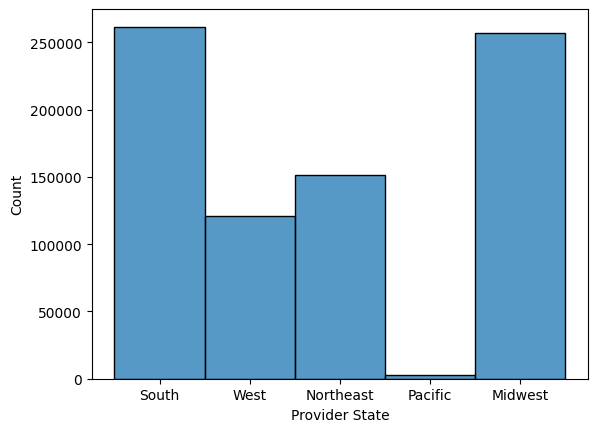

In [137]:
sns.histplot(dff['Provider State'], bins =20)

In [88]:
upToDateResidents = dff['Percentage of Current Residents Up to Date with COVID-19 Vaccines']
upToDateResidents .value_counts()
upToDateResidents  = pd.to_numeric(upToDateResidents ,errors='coerce') # Typecast upToDateResidents to float/numeric


In [ ]:
sns.boxplot(data=df, x=upToDateResidents)

Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

<Axes: xlabel='Percentage of Current Residents Up to Date with COVID-19 Vaccines', ylabel='Density'>

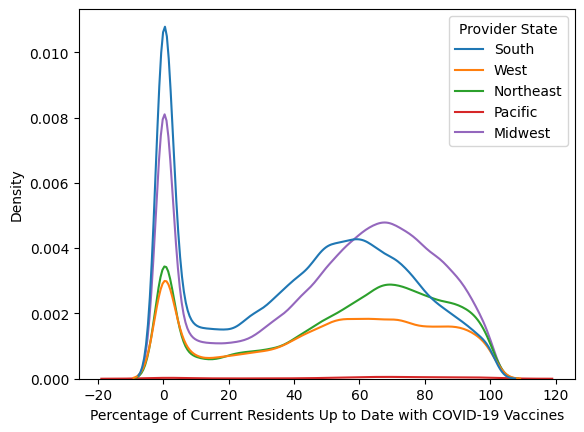

In [134]:
sns.kdeplot(data=dff,x=upToDateResidents,hue= cleanedStates)

The kernel density plot appears to shot that more residents in nursing home in the midwest have a larger percent of being up to data with the COVID-19 vaccine, while a lot of people in the South tend to have a higher percent of residents that are not up to date with their vaccine. The results may require some transformations especially when trying to observe the lower end of of the percentages where the data seems to be negative (this does not make sense)


Create a scatter plot, and describe the relationship you see.

<Axes: xlabel='Percentage of Current Residents Up to Date with COVID-19 Vaccines', ylabel='Residents Total Confirmed COVID-19'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


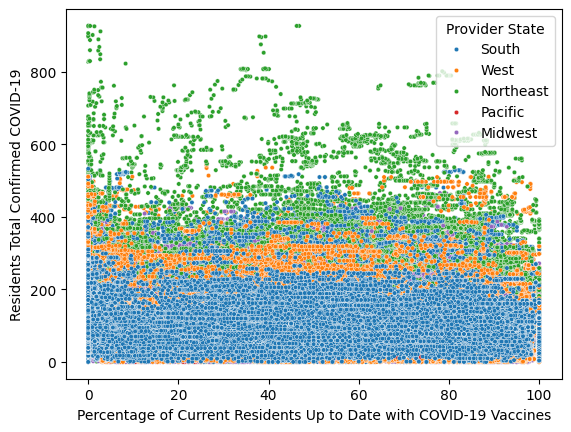

In [136]:
sns.scatterplot(data=df,x=upToDateResidents,y=cases,hue=cleanedStates, s =10)

There seems to be a slight negative correlation where the percent of current residents are up to date with their vaccine is high and the total confirrmed COVID-19 cases is lower. This is a good sign that can show some effectiveness in the vaccine. You can also see that especially in the Northeast there are high number of cases where the percent of current residents that are up to date with their vaccine is low.

Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.

In [143]:
dff.loc[:,['Provider State','Percentage of Current Residents Up to Date with COVID-19 Vaccines']].groupby('Provider State').describe()

Percentage of Current Residents Up to Date with COVID-19 Vaccines  \
                                                                           count   
Provider State                                                                     
Midwest                                                  252918.0                  
Northeast                                                148148.0                  
Pacific                                                    2586.0                  
South                                                    257273.0                  
West                                                     117811.0                  

                                                                              
                     mean        std  min       25%     50%       75%    max  
Provider State                                                                
Midwest         50.843313  30.874729  0.0  26.88425  57.778  75.29400  100.0  
Northeast       54.887026  30.542617  0.0  34.14600  61.972  78.97475  100.0  
Pacific         60.851412  30.368510  0.0  48.27600  67.095  83.33300  100.0  
South           42.644403  30.467550  0.0   9.67700  47.059  66.92300  100.0  
West            50.493236  31.331322  0.0  24.67500  55.263  76.04200  100.0

It appears that there is a higher average of percent of current residents in the nursing homes who are up to date with their vaccines in the Pacific regions. However, this is also the region that has the smallest count which does not show an accurate display that those residents actually have the highest average. It is interesting to see that the South has the lowest percent average in the first quartile of data. In general, this relationship can be influenced by factors such as vaccination rates, public health measures, demographics, healthcare infrastructure, and government policies in the provider areas.